In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [191]:
#Imposto lo stile dei grafici
mpl.rcParams['axes.titlecolor'] = '#FFFFFF'
mpl.rcParams['axes.titlepad'] = 15
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelcolor'] = '#FFFFFF'
mpl.rcParams['axes.labelpad'] = 15
mpl.rcParams['axes.labelsize'] = 14.5
mpl.rcParams['axes.axisbelow'] = True
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['xtick.color'] = '#FFFFFF'
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.color'] = '#FFFFFF'
mpl.rcParams['ytick.labelsize'] = 11
#Colore esterno grafico
mpl.rcParams['figure.facecolor'] = '#516482'
#Colore sfondo grafico
mpl.rcParams['axes.facecolor'] = '#FFFFFF'
#Bordi grafico
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False

In [192]:
countries_gdp_data = pd.read_csv('data/usa-ussr-gdp.csv', sep=';', index_col=0)
countries_gdp_data['GDP'] = countries_gdp_data['GDP'].map(lambda x: x / 1000000000)

#Memorizzo solo le colonne che mi interessano
usa_data = countries_gdp_data.loc[['United States'], ['Year', 'GDP']]
ussr_data = countries_gdp_data.loc[['Former USSR'], ['Year', 'GDP']]

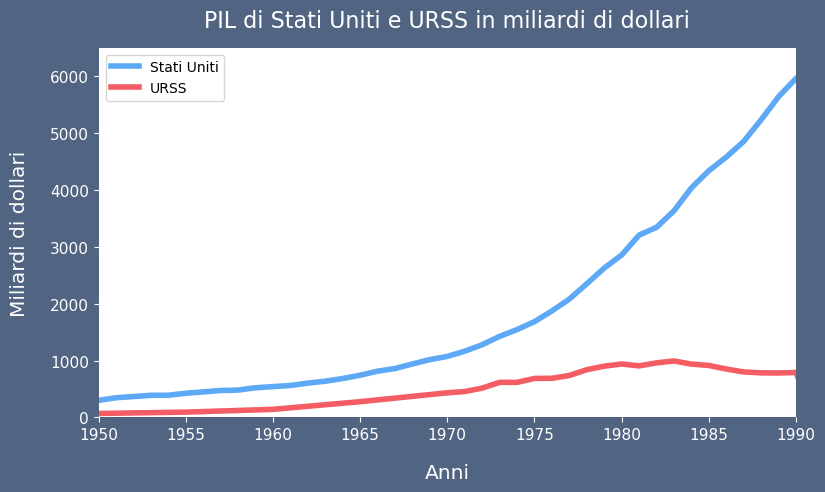

In [193]:
fig, ax = plt.subplots(figsize=(9, 4.8))

x1 = usa_data['Year'].values
y1 = usa_data['GDP'].values

x2 = ussr_data['Year'].values
y2 = ussr_data['GDP'].values

plt.plot(x1, y1, color='#5da9f5', linewidth=4)
plt.plot(x2, y2, color='#f55d64', linewidth=4)

plt.legend(['Stati Uniti', 'URSS'], loc='upper left')
plt.xlim(1950, 1990)
plt.ylim(0, 6500)
ax.set_xlabel('Anni')
ax.set_ylabel('Miliardi di dollari')
ax.set_title('PIL di Stati Uniti e URSS in miliardi di dollari')

#plt.show()
plt.savefig('g1.png', dpi=400, bbox_inches='tight')

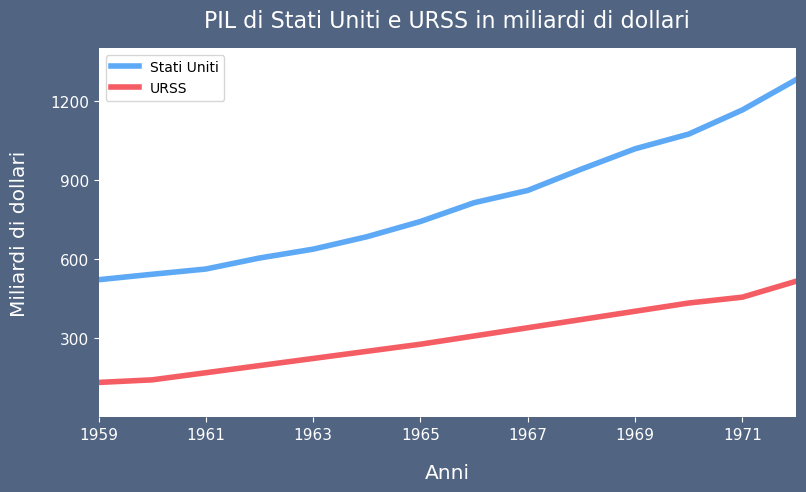

In [194]:
fig, ax = plt.subplots(figsize=(9, 4.8))

plt.plot(x1, y1, color='#5da9f5', linewidth=4)
plt.plot(x2, y2, color='#f55d64', linewidth=4)

plt.legend(['Stati Uniti', 'URSS'], loc='upper left')
plt.xticks([1959, 1961, 1963, 1965, 1967, 1969, 1971, 1973])
plt.yticks([300, 600, 900, 1200, 1500])
plt.xlim(1959, 1972)
plt.ylim(0, 1400)
ax.set_xlabel('Anni')
ax.set_ylabel('Miliardi di dollari')
ax.set_title('PIL di Stati Uniti e URSS in miliardi di dollari')

#plt.show()
plt.savefig('g2.png', dpi=400, bbox_inches='tight')

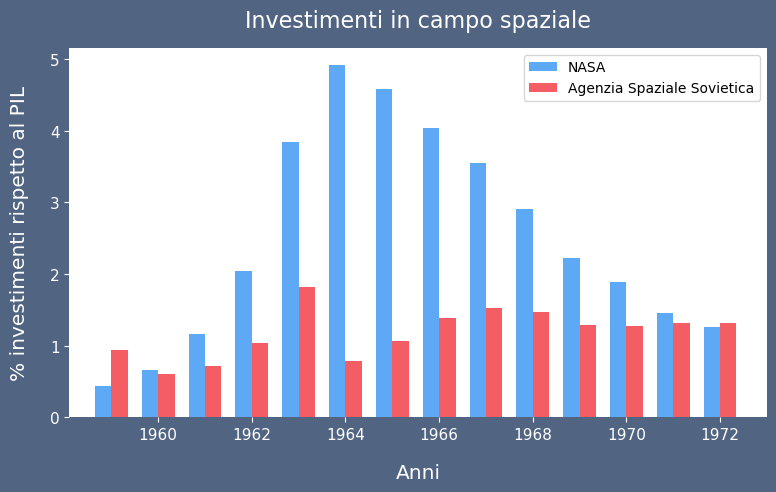

In [195]:
nasa_ssp_annual_budgdet = pd.read_csv('data/nasa-soviet-space-program-annual-budget.csv', sep=';', index_col=0)
#Memorizzo solo le colonne che mi interessano
usa_data = nasa_ssp_annual_budgdet.loc[['NASA'], ['Year', 'Million Dollar Budget']]
ussr_data = nasa_ssp_annual_budgdet.loc[['Soviet Space Program'], ['Year', 'Million Dollar Budget']]
#Trasformo i budget da milioni a miliardi, in modo da avere la stessa unità di misura del PIL
usa_data['Billion Dollar Budget'] = usa_data['Million Dollar Budget'] / 1000
ussr_data['Billion Dollar Budget'] = ussr_data['Million Dollar Budget'] / 1000
#Calcolo qual è la percentuale del budget dedicato alla ricerca spaziale rispetto al PIL del paese
    
#nasa_percentage_budget = usa_data['Billion Dollar Budget']
usa_data = usa_data.loc[(usa_data['Year'] >= 1959) & (usa_data['Year'] <= 1972), ['Year', 'Billion Dollar Budget']]
usa_data = pd.merge(countries_gdp_data.loc[['United States']], usa_data, on='Year')

ussr_data = ussr_data.loc[(ussr_data['Year'] >= 1959) & (ussr_data['Year'] <= 1972), ['Year', 'Billion Dollar Budget']]
ussr_data = pd.merge(countries_gdp_data.loc[['Former USSR']], ussr_data, on='Year')

usa_data['Percentage Of GDP'] = (usa_data['Billion Dollar Budget'] * 100) / usa_data['GDP']
ussr_data['Percentage Of GDP'] = (ussr_data['Billion Dollar Budget'] * 100) / ussr_data['GDP']

#print(ussr_data)
#print(usa_data)

percentage_of_gdp = pd.DataFrame({'NASA': usa_data['Percentage Of GDP'].values, 'SSA': ussr_data['Percentage Of GDP'].values}, index = ussr_data['Year'])
#print(percentage_of_gdp)

#Larghezza barra
barWidth = 0.35
fig, ax = plt.subplots(figsize=(9, 4.8))
 
#Posizione barre
br1 = [x - barWidth / 2 for x in range(1959, 1973)]
br2 = [x + barWidth for x in br1]

plt.bar(br1, percentage_of_gdp['NASA'].values, color='#5da9f5', width=barWidth)
plt.bar(br2, percentage_of_gdp['SSA'].values, color='#f55d64', width=barWidth)
plt.xlim(1958.1, 1973)
plt.legend(['NASA', 'Agenzia Spaziale Sovietica'], loc='upper right')

#Etichette
ax.set_xlabel('Anni')
ax.set_ylabel('% investimenti rispetto al PIL')
ax.set_title('Investimenti in campo spaziale')

#plt.show()
plt.savefig('g3.png', dpi=400, bbox_inches='tight')

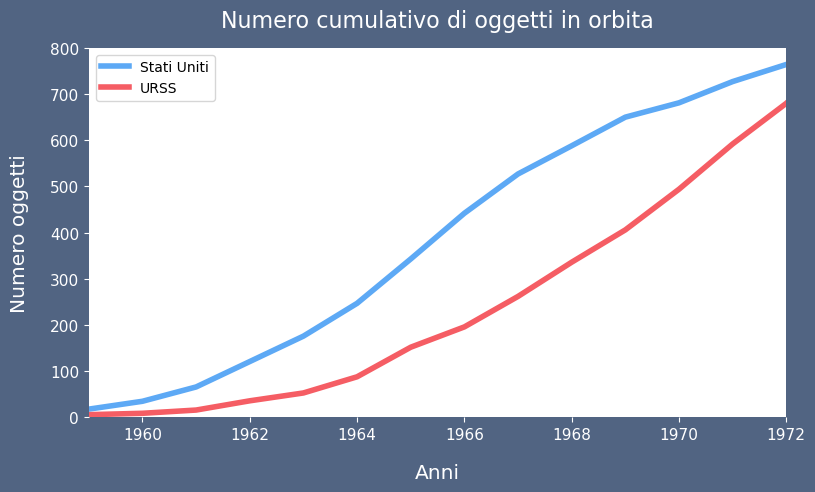

In [196]:
objects_launches = pd.read_csv('data/cumulative-number-of-objects-launched-into-outer-space.csv', sep=',', index_col=0)
usa_launches = objects_launches.loc['United States']
urss_launches = objects_launches.loc['Russia']

fig, ax = plt.subplots(figsize=(9, 4.8))

x1 = usa_launches["Year"].values
y1 = usa_launches["Cumulative Launches"].values

x2 = urss_launches["Year"].values
y2 = urss_launches["Cumulative Launches"].values

plt.plot(x1, y1, color='#5da9f5', linewidth=4)
plt.plot(x2, y2, color='#f55d64', linewidth=4)

plt.legend(['Stati Uniti', 'URSS'], loc='upper left')
plt.xlim(1959, 1972)
plt.ylim(0, 800)

#Etichette
ax.set_xlabel('Anni')
ax.set_ylabel('Numero oggetti')
ax.set_title('Numero cumulativo di oggetti in orbita')

#plt.show()
plt.savefig('g4.png', dpi=400, bbox_inches='tight')

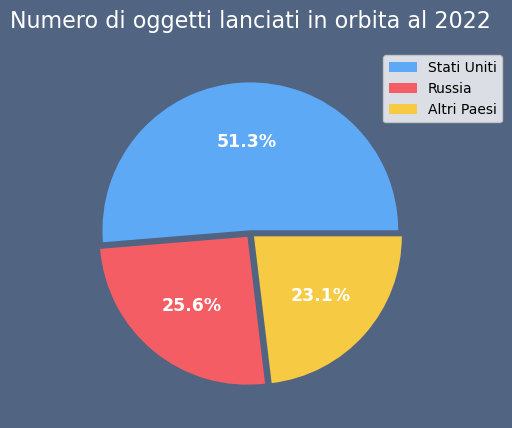

In [197]:
objects_launches = pd.read_csv('data/cumulative-number-of-objects-launched-into-outer-space.csv', sep=',', index_col=0)

usa = objects_launches[objects_launches['Year'] == 2022].sort_values(by='Cumulative Launches', ascending=False)['Cumulative Launches'][1]
russia = objects_launches[objects_launches['Year'] == 2022].sort_values(by='Cumulative Launches', ascending=False)['Cumulative Launches'][2]
world = objects_launches[objects_launches['Year'] == 2022].sort_values(by='Cumulative Launches', ascending=False)['Cumulative Launches'][0]

fig, ax = plt.subplots()

x = [usa, russia, (world - usa - russia)]
c = ['#5da9f5', '#f55d64', '#f7ca43']

plt.pie(x, colors=c, explode=[0.02, 0.032, 0.032], autopct='%1.1f%%', textprops={'color':'white', 'weight':'bold', 'fontsize':12.5})

ax.set_title('Numero di oggetti lanciati in orbita al 2022')
plt.legend(['Stati Uniti', 'Russia', 'Altri Paesi'], bbox_to_anchor=(1.2, 1), loc='upper right')
#plt.show()
plt.savefig('g5.png', dpi=400, bbox_inches='tight')

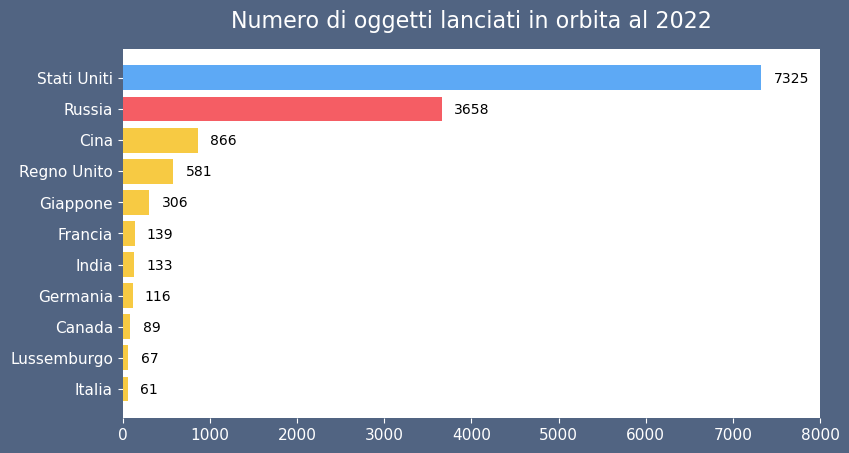

In [198]:
objects_launches = pd.read_csv('data/cumulative-number-of-objects-launched-into-outer-space.csv', sep=',', index_col=0)
object_launches = objects_launches[objects_launches['Year'] == 2022].sort_values(by='Cumulative Launches', ascending=False)['Cumulative Launches'][1:12]
x = ['Stati Uniti', 'Russia', 'Cina', 'Regno Unito', 'Giappone', 'Francia', 'India', 'Germania', 'Canada', 'Lussemburgo', 'Italia']
y = object_launches.values.tolist()

c = ['#5da9f5'] + ['#f55d64'] + ['#f7ca43'] * (len(x) - 2)

fig, ax = plt.subplots(figsize=(9, 4.8))

for i, v in enumerate(y): ax.text(v + 140, i + .16, str(v))

ax.barh(x, y, color=c)
ax.invert_yaxis()

ax.set_title('Numero di oggetti lanciati in orbita al 2022')
plt.xlim(0, 8000)

#plt.show()
plt.savefig('g6.png', dpi=400, bbox_inches='tight')

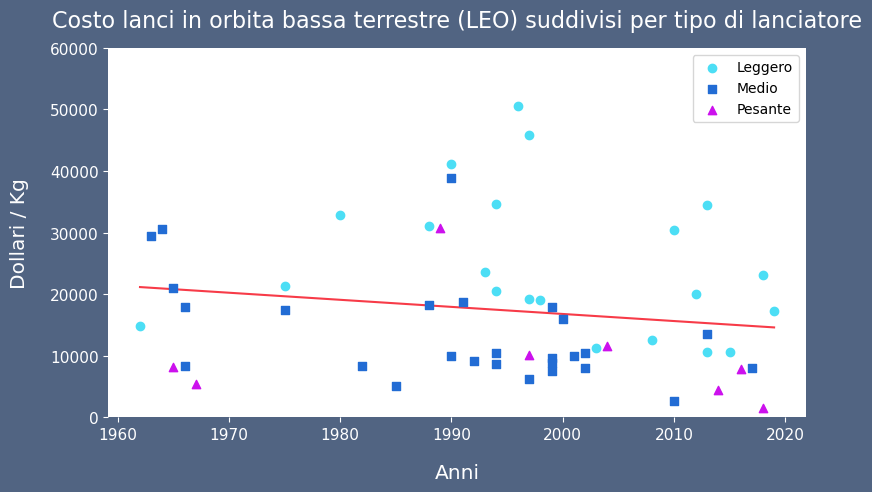

In [199]:
rockets = pd.read_csv('data/cost-space-launches-low-earth-orbit.csv', sep=',', index_col=0)
rockets = rockets.sort_values(by='Cost Per KG')
rockets = rockets[rockets['Cost Per KG'] < 60000]

small_rockets = rockets[rockets['Launch Class'] == 'Small']
medium_rockets = rockets[rockets['Launch Class'] == 'Medium']
heavy_rockets = rockets[rockets['Launch Class'] == 'Heavy']

fig, ax = plt.subplots(figsize=(9, 4.8))

all_years = np.concatenate([small_rockets['Year'].values, medium_rockets['Year'].values, heavy_rockets['Year'].values])
all_costs = np.concatenate([small_rockets['Cost Per KG'].values, medium_rockets['Cost Per KG'].values, heavy_rockets['Cost Per KG'].values])

m, b = np.polyfit(all_years, all_costs, 1)
#Stampo a video la linea di regressione, indicando solo il primo e l'ultimo punto
plt.plot(np.sort(all_years)[[0, len(all_years) - 1]], m * np.sort(all_years)[[0, len(all_years) - 1]] + b, color='#F73B48', linewidth=1.5, zorder=1)

plt.scatter(small_rockets['Year'].values, small_rockets['Cost Per KG'].values, color='#4cdef5', label='Leggero', marker='o')
plt.scatter(medium_rockets['Year'].values, medium_rockets['Cost Per KG'].values, color='#226cd4', label='Medio', marker='s')
plt.scatter(heavy_rockets['Year'].values, heavy_rockets['Cost Per KG'].values, color='#cc11ed', label='Pesante', marker='^')

ax.set_xlabel('Anni')
ax.set_ylabel('Dollari / Kg')
ax.set_title('Costo lanci in orbita bassa terrestre (LEO) suddivisi per tipo di lanciatore')
plt.ylim(0, 60000)
plt.legend()
#plt.show()
plt.savefig('g7.png', dpi=400, bbox_inches='tight')

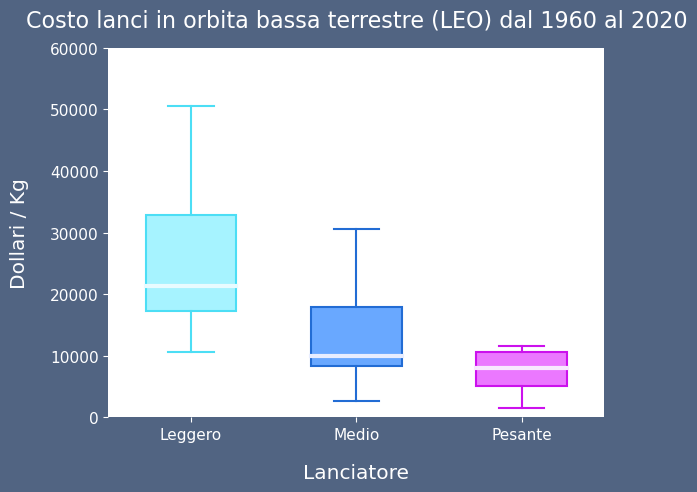

In [200]:
rockets = pd.read_csv('data/cost-space-launches-low-earth-orbit.csv', sep=',', index_col=0)
rockets = rockets[rockets['Cost Per KG'] < 60000]
small_rockets = rockets[(rockets['Launch Class'] == 'Small')]
medium_rockets = rockets[(rockets['Launch Class'] == 'Medium')]
heavy_rockets = rockets[(rockets['Launch Class'] == 'Heavy')]

s = small_rockets["Cost Per KG"].tolist()
m = medium_rockets["Cost Per KG"].tolist()
h = heavy_rockets["Cost Per KG"].tolist()
data = [s, m, h]

fig, ax = plt.subplots()

ax.boxplot(s, positions=[1], widths=0.55, patch_artist=True, showmeans=False, showfliers=False,
    medianprops={"color": "#e8fbff", "linewidth": 3},
    boxprops={"facecolor": "#a6f3ff", "edgecolor": "#4cdef5", "linewidth": 1.5},
    whiskerprops={"color": "#4cdef5", "linewidth": 1.5},
    capprops={"color": "#4cdef5", "linewidth": 1.5})

ax.boxplot(m, positions=[2], widths=0.55, patch_artist=True, showmeans=False, showfliers=False,
    medianprops={"color": "#e8edff", "linewidth": 3},
    boxprops={"facecolor": "#69a8ff", "edgecolor": "#226cd4", "linewidth": 1.5},
    whiskerprops={"color": "#226cd4", "linewidth": 1.5},
    capprops={"color": "#226cd4", "linewidth": 1.5})

ax.boxplot(h, positions=[3], widths=0.55, patch_artist=True, showmeans=False, showfliers=False,
    medianprops={"color": "#f8e8ff", "linewidth": 3},
    boxprops={"facecolor": "#eb78ff", "edgecolor": "#cc11ed", "linewidth": 1.5},
    whiskerprops={"color": "#cc11ed", "linewidth": 1.5},
    capprops={"color": "#cc11ed", "linewidth": 1.5})


plt.xticks([1, 2, 3], ['Leggero', 'Medio', 'Pesante'])
ax.set_ylabel('Dollari / Kg')
ax.set_xlabel('Lanciatore')
ax.set_title('Costo lanci in orbita bassa terrestre (LEO) dal 1960 al 2020')
plt.ylim(0, 60000)

#plt.show()
plt.savefig('g8.png', dpi=400, bbox_inches='tight')

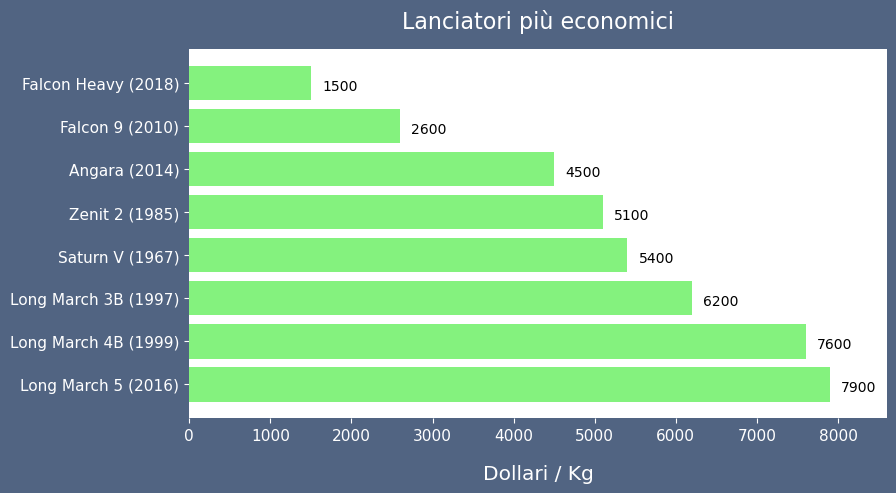

In [201]:
rockets = pd.read_csv('data/cost-space-launches-low-earth-orbit.csv', sep=',', index_col=0)
first_ones = rockets.sort_values(by='Cost Per KG')[0:8]
x = first_ones['Cost Per KG'].values.tolist()

y = []
for i, v in enumerate(first_ones.index.tolist()):
    y.append(first_ones.index[i] + ' (' + str(first_ones['Year'][i]) + ')')

fig, ax = plt.subplots(figsize=(9, 4.8))


for i, v in enumerate(x): ax.text(v + 140, i + .16, str(v))


ax.barh(y, x, color='#84f27e')
ax.invert_yaxis()



ax.set_title('Lanciatori più economici')
ax.set_xlabel('Dollari / Kg')
plt.xlim(0, 8600)

#plt.show()
plt.savefig('g9.png', dpi=400, bbox_inches='tight')



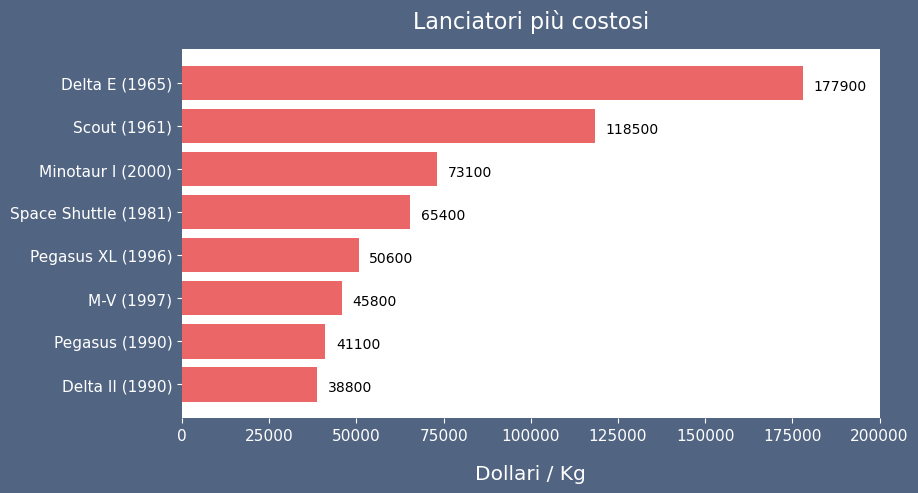

In [202]:
rockets = pd.read_csv('data/cost-space-launches-low-earth-orbit.csv', sep=',', index_col=0)
last_ones = rockets.sort_values(by='Cost Per KG', ascending=False)[0:8]
x = last_ones['Cost Per KG'].values.tolist()

y = []
for i, v in enumerate(last_ones.index.tolist()):
    y.append(last_ones.index[i] + ' (' + str(last_ones['Year'][i]) + ')')
c = ['#f5a95d'] * len(x)

fig, ax = plt.subplots(figsize=(9, 4.8))


for i, v in enumerate(x): ax.text(v + 3000, i + .16, str(v))


ax.barh(y, x, color='#eb6767')
ax.invert_yaxis()

ax.set_title('Lanciatori più costosi')
ax.set_xlabel('Dollari / Kg')
plt.xlim(0, 200000)

#plt.show()
plt.savefig('g10.png', dpi=400, bbox_inches='tight')


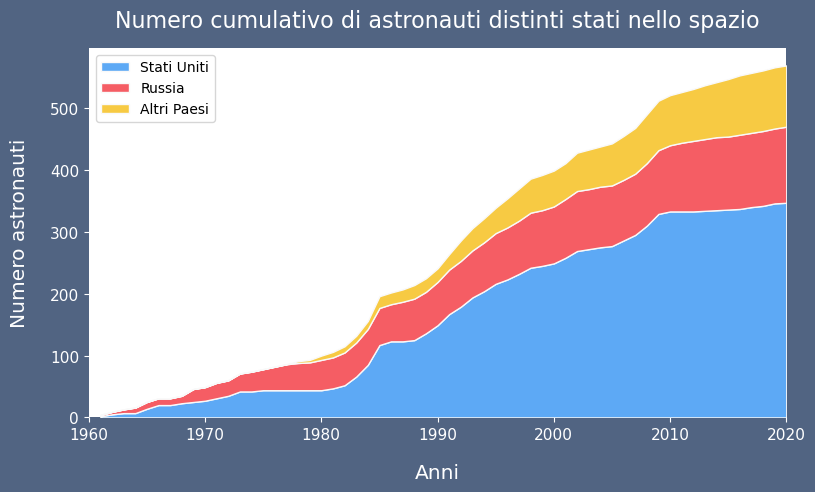

In [203]:
astronauts = pd.read_csv('data/cumulative-people-space.csv', sep=',', index_col=0)
russian_astronauts = astronauts.loc['Russia']
american_astronauts = astronauts.loc['United States']
other_astronauts = astronauts.loc['World']

other_astronauts_cumulative = []
for index, row in other_astronauts.iterrows():
    other_astronauts_cumulative.append(int((other_astronauts[(other_astronauts['Year'] == row['Year'])]['Cumulative Individuals']).values) - int((american_astronauts[(american_astronauts['Year'] == row['Year'])]['Cumulative Individuals']).values) - int((russian_astronauts[(russian_astronauts['Year'] == row['Year'])]['Cumulative Individuals']).values))

other_astronauts_years = other_astronauts['Year'].values.tolist()
    
fig, ax = plt.subplots(figsize=(9, 4.8))

x = american_astronauts['Year'].values.tolist()
y1 = american_astronauts['Cumulative Individuals'].values.tolist()
y2 = russian_astronauts['Cumulative Individuals'].values.tolist()
y3 = other_astronauts_cumulative

plt.stackplot(x, y1, y2, y3, baseline='zero', colors=['#5da9f5', '#f55d64', '#f7ca43'], edgecolors='#F9F9F9', linewidth=1)

plt.legend(['Stati Uniti', 'Russia', 'Altri Paesi'], loc='upper left')

#Etichette
ax.set_xlabel('Anni')
ax.set_ylabel('Numero astronauti')
ax.set_title('Numero cumulativo di astronauti distinti stati nello spazio')
plt.xlim(1960, 2020)

#plt.show()
plt.savefig('g11.png', dpi=400, bbox_inches='tight')


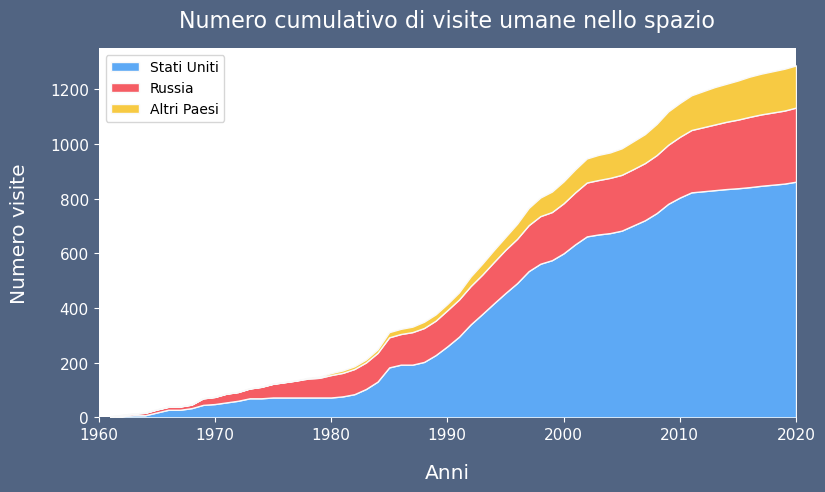

In [204]:
visits = pd.read_csv('data/cumulative-space-visits.csv', sep=',', index_col=0)
russian_visits = visits.loc['Russia']
american_visits = visits.loc['United States']
other_visits = visits.loc['World']

other_visits_cumulative = []
for index, row in other_visits.iterrows():
    other_visits_cumulative.append(int((other_visits[(other_visits['Year'] == row['Year'])]['Cumulative Visits']).values) - int((american_visits[(american_visits['Year'] == row['Year'])]['Cumulative Visits']).values) - int((russian_visits[(russian_visits['Year'] == row['Year'])]['Cumulative Visits']).values))

other_visits_years = other_visits['Year'].values.tolist()
    
fig, ax = plt.subplots(figsize=(9, 4.8))

x = american_visits['Year'].values.tolist()
y1 = american_visits['Cumulative Visits'].values.tolist()
y2 = russian_visits['Cumulative Visits'].values.tolist()
y3 = other_visits_cumulative

plt.stackplot(x, y1, y2, y3, baseline='zero', colors=['#5da9f5', '#f55d64', '#f7ca43'], edgecolors='#F9F9F9', linewidth=1)

plt.legend(['Stati Uniti', 'Russia', 'Altri Paesi'], loc='upper left')

#Etichette
ax.set_xlabel('Anni')
ax.set_ylabel('Numero visite')
ax.set_title('Numero cumulativo di visite umane nello spazio')
plt.xlim(1960, 2020)

#plt.show()
plt.savefig('g12.png', dpi=400, bbox_inches='tight')

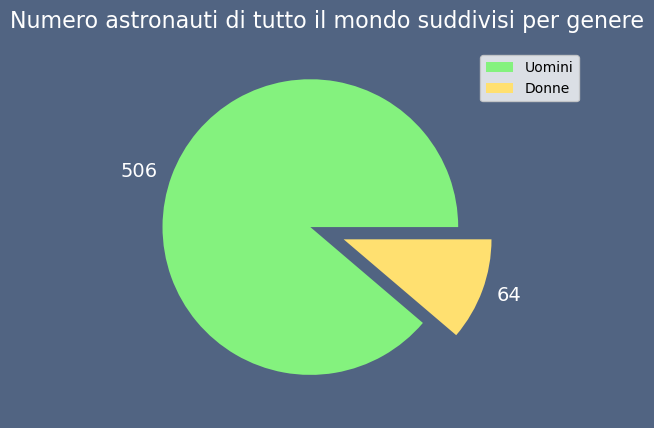

In [205]:
astronauts = pd.read_csv('data/international-astronaut-database.csv', sep=',', index_col=0)
#"Name","Country","Gender","Flights","Total Flights","Total Flight Time (ddd:hh:mm)"
man_astronauts = astronauts[astronauts['Gender'] == 'Man']
woman_astronauts = astronauts[astronauts['Gender'] == 'Woman']

fig, ax = plt.subplots()

x = [len(man_astronauts), len(woman_astronauts)]
c = ['#84f27e', '#ffe070']

wedges, texts = plt.pie(x, colors=c, labels=x, explode=[0.12, 0.12])

for text in texts:
    text.set_color('white')
    text.set_fontsize(14)

ax.set_title('Numero astronauti di tutto il mondo suddivisi per genere')
plt.legend(['Uomini', 'Donne', 'Altri Paesi'], bbox_to_anchor=(1.2, 1), loc='upper right')
#plt.show()
plt.savefig('g13.png', dpi=400, bbox_inches='tight')




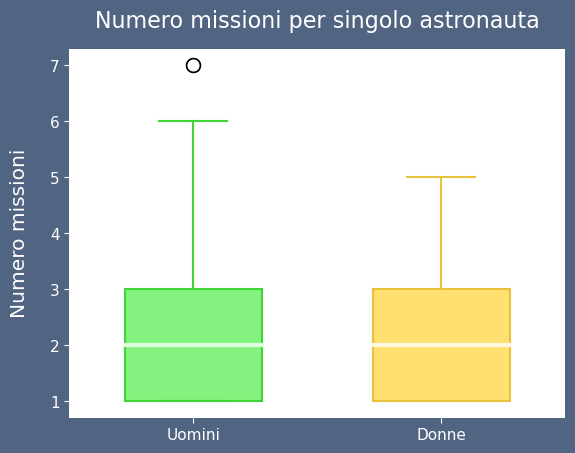

In [206]:
astronauts = pd.read_csv('data/international-astronaut-database.csv', sep=',', index_col=0)
#"Name","Country","Gender","Flights","Total Flights","Total Flight Time (ddd:hh:mm)"
man_astronauts = astronauts[astronauts['Gender'] == 'Man']['Total Flights'].values.tolist()
woman_astronauts = astronauts[astronauts['Gender'] == 'Woman']['Total Flights'].values.tolist()

fig, ax = plt.subplots()

ax.boxplot(man_astronauts, positions=[1], widths=0.55, patch_artist=True, showmeans=False, showfliers=True,
    medianprops={"color": "#ddffdb", "linewidth": 3},
    flierprops={"marker": 'o', 'markersize':10},
    boxprops={"facecolor": "#84f27e", "edgecolor": "#3fd437", "linewidth": 1.5},
    whiskerprops={"color": "#3fd437", "linewidth": 1.5},
    capprops={"color": "#3fd437", "linewidth": 1.5})

ax.boxplot(woman_astronauts, positions=[2], widths=0.55, patch_artist=True, showmeans=False, showfliers=True,
    medianprops={"color": "#fff9e3", "linewidth": 3},
    boxprops={"facecolor": "#ffe070", "edgecolor": "#e8c23a", "linewidth": 1.5},
    whiskerprops={"color": "#e8c23a", "linewidth": 1.5},
    capprops={"color": "#e8c23a", "linewidth": 1.5})

plt.xticks([1, 2], ['Uomini', 'Donne'])
ax.set_title('Numero missioni per singolo astronauta')
ax.set_ylabel('Numero missioni')
#plt.show()
plt.savefig('g14.png', dpi=400, bbox_inches='tight')

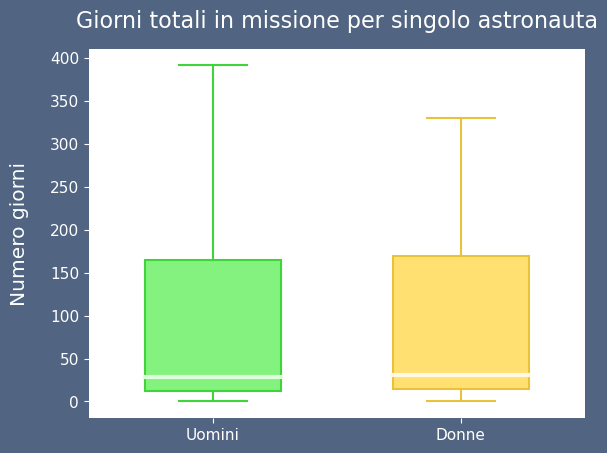

In [207]:
astronauts = pd.read_csv('data/international-astronaut-database.csv', sep=',', index_col=0)
#"Name","Country","Gender","Flights","Total Flights","Total Flight Time (ddd:hh:mm)"
man_astronauts = astronauts[astronauts['Gender'] == 'Man']['Total Flight Time'].values.tolist()
woman_astronauts = astronauts[astronauts['Gender'] == 'Woman']['Total Flight Time'].values.tolist()

for i in range(len(man_astronauts)):
    split_values = man_astronauts[i].split(":")
    new_value = int(split_values[0])
    man_astronauts[i] = new_value
    
for i in range(len(woman_astronauts)):
    split_values = woman_astronauts[i].split(":")
    new_value = int(split_values[0])
    woman_astronauts[i] = new_value

fig, ax = plt.subplots()

ax.boxplot(man_astronauts, positions=[1], widths=0.55, patch_artist=True, showmeans=False, showfliers=False,
    medianprops={"color": "#ddffdb", "linewidth": 3},
    flierprops={"marker": 'o', 'markersize':10},
    boxprops={"facecolor": "#84f27e", "edgecolor": "#3fd437", "linewidth": 1.5},
    whiskerprops={"color": "#3fd437", "linewidth": 1.5},
    capprops={"color": "#3fd437", "linewidth": 1.5})

ax.boxplot(woman_astronauts, positions=[2], widths=0.55, patch_artist=True, showmeans=False, showfliers=False,
    medianprops={"color": "#fff9e3", "linewidth": 3},
    boxprops={"facecolor": "#ffe070", "edgecolor": "#e8c23a", "linewidth": 1.5},
    whiskerprops={"color": "#e8c23a", "linewidth": 1.5},
    capprops={"color": "#e8c23a", "linewidth": 1.5})

plt.xticks([1, 2], ['Uomini', 'Donne'])
ax.set_title('Giorni totali in missione per singolo astronauta')
ax.set_ylabel('Numero giorni')
#plt.show()
plt.savefig('g15.png', dpi=400, bbox_inches='tight')

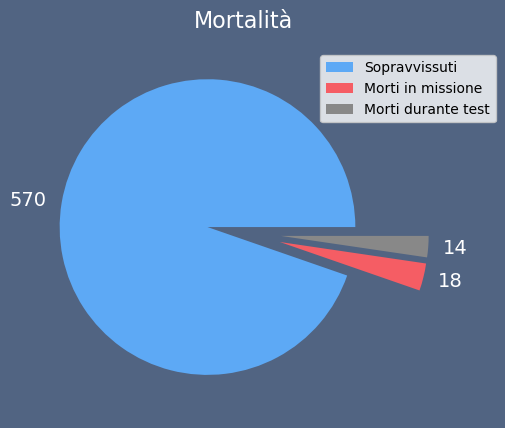

In [208]:
fig, ax = plt.subplots()

c = ['#5da9f5', '#f55d64', '#888888']

wedges, texts = plt.pie([570, 18, 14], colors=c, labels=[570, 18, 14], explode=[0.25, 0.25, 0.25])

for text in texts:
    text.set_color('white')
    text.set_fontsize(14)

ax.set_title('Mortalità')
plt.legend(['Sopravvissuti', 'Morti in missione', 'Morti durante test'], bbox_to_anchor=(1.2, 1), loc='upper right')
#plt.show()
plt.savefig('g16.png', dpi=400, bbox_inches='tight')